# Model Evaluation and Hyperparameter tuning
## Ch6 of Python for ML

In [4]:
## read in dataset from UCI
import pandas as pd

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)

In [6]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [7]:
## Transform tumor type (M or B) to integers
from sklearn.preprocessing import LabelEncoder

In [8]:
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
le.transform(['M','B'])

array([1, 0])

In [10]:
## Build training/test sets
from sklearn.cross_validation import train_test_split

In [11]:
X_train, X_test, y_train, y_test = \
    train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [13]:
## Build the pipeline
pipe_lr = Pipeline([('scl',StandardScaler()), 
                    ('pca',PCA(n_components=2)),
                    ('clf',LogisticRegression(random_state=1))])

In [14]:
## Apply the pipeline to the data
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=2, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [15]:
## Print performance on the test set
print 'Test accuracy: %.3f' % pipe_lr.score(X_test,y_test)

Test accuracy: 0.947


## k-fold cross-validation to assess model performance

### holdout method

### k-fold cross-validation

In [16]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

In [17]:
kfold = StratifiedKFold(y=y_train, n_folds=10, random_state=1)

In [18]:
scores=[]

In [19]:
for k, (train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print 'Fold: %s, Class dist: %s, Accuracy: %.3f' % \
            (k+1, np.bincount(y_train[train]), score)

Fold: 1, Class dist: [256 153], Accuracy: 0.891
Fold: 2, Class dist: [256 153], Accuracy: 0.978
Fold: 3, Class dist: [256 153], Accuracy: 0.978
Fold: 4, Class dist: [256 153], Accuracy: 0.913
Fold: 5, Class dist: [256 153], Accuracy: 0.935
Fold: 6, Class dist: [257 153], Accuracy: 0.978
Fold: 7, Class dist: [257 153], Accuracy: 0.933
Fold: 8, Class dist: [257 153], Accuracy: 0.956
Fold: 9, Class dist: [257 153], Accuracy: 0.978
Fold: 10, Class dist: [257 153], Accuracy: 0.956


In [20]:
print 'CV accuracy score: %.3f +/- %.3f' % \
        (np.mean(scores), np.std(scores))

CV accuracy score: 0.950 +/- 0.029


In [21]:
from sklearn.cross_validation import cross_val_score

In [22]:
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1
                        )

In [23]:
print 'CV accuracy scores: %s' % scores

CV accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]


In [24]:
print 'CV accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores))

CV accuracy 0.950 +/- 0.029


## Evaluating bias and variance

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

In [26]:
pipe_lr = Pipeline([ ('scl',StandardScaler()),('clf',LogisticRegression(penalty='l2',random_state=0))])

In [27]:
train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe_lr,
                   X=X_train,
                   y=y_train,
                   train_sizes=np.linspace(0.1,1.0,10),
                   cv=10,
                   n_jobs=-1)

In [28]:
train_mean = np.mean(train_scores,axis=1)

In [29]:
train_std = np.std(train_scores,axis=1)

In [30]:
test_mean = np.mean(test_scores,axis=1)

In [31]:
test_std = np.std(test_scores,axis=1)

(0.8, 1.0)

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


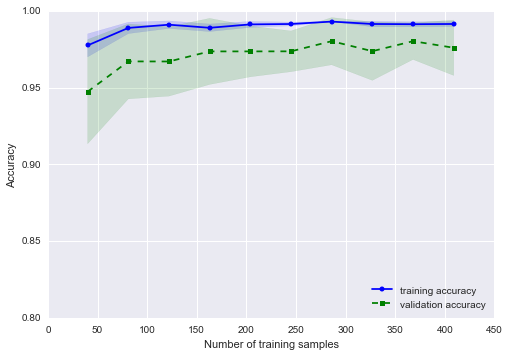

In [32]:
import seaborn as sns; sns.set()
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, 
                 train_mean+train_std,
                 train_mean-train_std,alpha=0.15, color='blue')
plt.plot(train_sizes,test_mean,
         color='green',linestyle='--',
         marker='s',markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean+test_std,
                 test_mean-test_std,
                 alpha=0.15,color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])

## Addressing over/underfitting with validation curves

In [33]:
from sklearn.learning_curve import validation_curve

In [34]:
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]

In [35]:
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_train,
                                             y=y_train,
                                             param_name='clf__C',
                                             param_range=param_range,
                                             cv=10)

In [36]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

(0.8, 1.0)

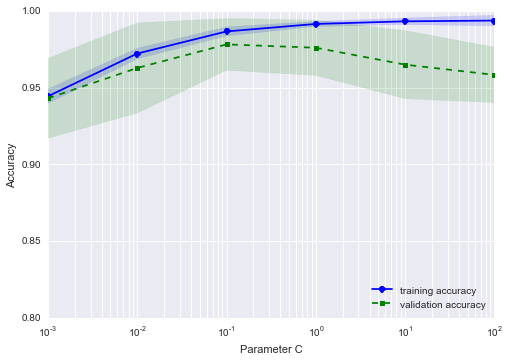

In [37]:
plt.plot(param_range,train_mean,
         color='blue',marker='o',label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,
                 train_mean-train_std,alpha=0.15,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='--',
         marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,
                 test_mean-test_std,alpha=0.15,color='green')

plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.0])

In [38]:
## Note: may also use RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [39]:
pipe_svc = Pipeline([('scl',StandardScaler()),('clf',SVC(random_state=1))])

In [40]:
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]

In [41]:
param_grid = [{'clf__C':param_range,
               'clf__kernel':['linear']},
              {'clf__C':param_range,
               'clf__gamma':param_range,
               'clf__kernel':['rbf']}]

In [42]:
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

In [43]:
gs = gs.fit(X_train,y_train)

In [44]:
## k-fold cv of best model
print gs.best_score_

0.978021978022


In [45]:
print gs.best_params_

{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [46]:
clf = gs.best_estimator_

In [47]:
clf.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [48]:
print 'Test accuracy: %.3f' % clf.score(X_test,y_test)

Test accuracy: 0.965


In [49]:
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=2,n_jobs=-1)

In [50]:
scores = cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=5)

In [51]:
print 'CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores))

CV accuracy: 0.965 +/- 0.025


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],
                  scoring="accuracy",
                  cv=5)

In [54]:
scores = cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=5)

In [55]:
print 'CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores))

CV accuracy: 0.908 +/- 0.045


## Confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [58]:
y_pred = pipe_svc.predict(X_test)

In [59]:
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [60]:
print confmat

[[71  1]
 [ 2 40]]


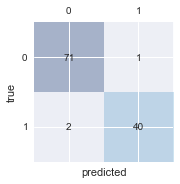

In [61]:
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],
                 va='center',ha='center')
plt.xlabel('predicted')
plt.ylabel('true')

In [62]:
from sklearn.metrics import precision_score

In [63]:
from sklearn.metrics import recall_score, f1_score

In [64]:
print 'Precision: %.3f' % precision_score(y_true=y_test,y_pred=y_pred)

Precision: 0.976


In [65]:
print 'Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred)

Recall: 0.952


In [66]:
print 'F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred)

F1: 0.964


In [67]:
from sklearn.metrics import make_scorer, f1_score

In [68]:
scorer = make_scorer(f1_score, pos_label=0)

In [69]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)

## Plot Receiver Operating Characterisitc (ROC)

In [75]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [76]:
X_train2 = X_train[:,[4,14]]

In [77]:
cv = StratifiedKFold(y_train,n_folds=3,random_state=1)

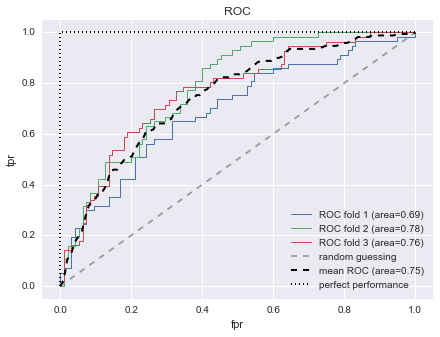

In [84]:
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr=[]
for i, (train,test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],\
                         y_train[train]).predict_proba(X_train2[test])
    fpr,tpr,thresholds = roc_curve(y_train[test],
                                   probas[:,1],
                                   pos_label=1)
    mean_tpr += interp(mean_fpr,fpr,tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,lw=1,
             label='ROC fold %d (area=%.2f)' % (i+1,roc_auc))

plt.plot([0,1],[0,1],
         linestyle='--',
         color=(0.6,0.6,0.6),
         label='random guessing')
mean_tpr /=len(cv)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,mean_tpr,'k--',
         label='mean ROC (area=%.2f)' % mean_auc, 
         lw=2)
plt.plot([0,0,1],
         [0,1,1],
         lw=2,
         linestyle=':',color='black',
         label='perfect performance')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC')
plt.legend(loc='lower right')

In [85]:
pipe_svc = pipe_svc.fit(X_train2,y_train)

In [86]:
y_pred2 = pipe_svc.predict(X_test[:,[4,14]])

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [88]:
print 'ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred2)

ROC AUC: 0.671


In [91]:
print 'Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2)

Accuracy: 0.728


## Scoring metric for multiclass classification

In [92]:
pre_scorer = make_scorer(score_func=precision_score,
                         pos_labels=1,
                         greater_is_better=True,average='micro')